In [25]:
#Importing different libraries for:
#Data preparation
import pandas as pd
import numpy as np
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#Data preprocessing
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_val_predict,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_curve,classification_report,accuracy_score,mean_squared_error

In [3]:
data = pd.read_csv("IST_data.csv")
data.head()

C:\Users\User1\AppData\Local\Temp\ipykernel_208\1567208602.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("IST_data.csv")


,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,...,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
0,1,17,D,M,69,Y,NaN,Y,Y,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,10,F,M,76,Y,NaN,Y,N,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1,43,F,F,71,N,NaN,Y,N,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,6,F,M,81,N,NaN,N,N,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,20,F,M,78,N,NaN,N,N,NaN,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(19435, 112)

In [5]:
#Extraction of the needed column
ex_data = data[["SEX","AGE","RSBP","RVISINF","RDEF1","RDEF2","RDEF3","RDEF4","RDEF5","RDEF6","RDEF7","STYPE","DDIAGISC",
                "DDIAGHA","DDIAGUN","DNOSTRK"]]
ex_data.rename(columns = {"RSBP": "BP",
                         "RVISINF": "INFARCTION",
                         "RDEF1": "Face_deficit".upper(),
                         "RDEF2": "Arm_deficit".upper(),
                         "RDEF3": "Leg_deficit".upper(),
                         "RDEF4": "Dysphasia".upper(),
                         "RDEF5": "Hemianopia".upper(),
                         "RDEF6": "VS_disorder".upper(),
                         "RDEF7": "cerebellar_signs".upper(),
                         "STYPE": "Stroke_type".upper(),
                         "DDIAGHA": "Haemorrhagic_diag".upper(),
                          "DDIAGISC": "ischemic_diag".upper(),
                          "DDIAGUN": "Indeterminate_diag".upper(),
                         "DNOSTRK": "Stroke".upper()}, inplace = True)
ex_data.head()


C:\Users\User1\AppData\Local\Temp\ipykernel_208\1029247729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_data.rename(columns = {"RSBP": "BP",


,SEX,AGE,BP,INFARCTION,FACE_DEFICIT,ARM_DEFICIT,LEG_DEFICIT,DYSPHASIA,HEMIANOPIA,VS_DISORDER,CEREBELLAR_SIGNS,STROKE_TYPE,ISCHEMIC_DIAG,HAEMORRHAGIC_DIAG,INDETERMINATE_DIAG,STROKE
0,M,69,140,Y,N,N,N,Y,N,Y,N,PACS,Y,N,N,N
1,M,76,150,N,Y,Y,Y,N,N,N,N,LACS,Y,N,N,N
2,F,71,170,N,Y,Y,Y,N,N,N,N,LACS,Y,N,N,N
3,M,81,170,N,N,N,N,Y,N,N,N,PACS,Y,N,N,N
4,M,78,170,N,Y,Y,Y,N,N,N,N,LACS,Y,N,N,N


In [6]:
ex_data.isnull().sum()

SEX                    0
AGE                    0
BP                     0
INFARCTION             0
FACE_DEFICIT           0
ARM_DEFICIT            0
LEG_DEFICIT            0
DYSPHASIA              0
HEMIANOPIA             0
VS_DISORDER            0
CEREBELLAR_SIGNS       0
STROKE_TYPE            0
ISCHEMIC_DIAG         23
HAEMORRHAGIC_DIAG     26
INDETERMINATE_DIAG    23
STROKE                26
dtype: int64

In [7]:
ex_data.dropna(inplace = True)
ex_data.isnull().sum()

C:\Users\User1\AppData\Local\Temp\ipykernel_208\939424408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_data.dropna(inplace = True)


SEX                   0
AGE                   0
BP                    0
INFARCTION            0
FACE_DEFICIT          0
ARM_DEFICIT           0
LEG_DEFICIT           0
DYSPHASIA             0
HEMIANOPIA            0
VS_DISORDER           0
CEREBELLAR_SIGNS      0
STROKE_TYPE           0
ISCHEMIC_DIAG         0
HAEMORRHAGIC_DIAG     0
INDETERMINATE_DIAG    0
STROKE                0
dtype: int64

In [8]:
ex_data.columns

Index(['SEX', 'AGE', 'BP', 'INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT',
       'LEG_DEFICIT', 'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER',
       'CEREBELLAR_SIGNS', 'STROKE_TYPE', 'ISCHEMIC_DIAG', 'HAEMORRHAGIC_DIAG',
       'INDETERMINATE_DIAG', 'STROKE'],
      dtype='object')

In [9]:
#Replacing yes and no with 1s and Os
ex_data[['INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT',
       'LEG_DEFICIT', 'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER',
       'CEREBELLAR_SIGNS']]=ex_data[['INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT','LEG_DEFICIT', 
                                     'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER','CEREBELLAR_SIGNS']].replace({"Y":2,
                                                                                                        "N":1,
                                                                                                         "C":0})

C:\Users\User1\AppData\Local\Temp\ipykernel_208\2870902762.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER','CEREBELLAR_SIGNS']].replace({"Y":2,
C:\Users\User1\AppData\Local\Temp\ipykernel_208\2870902762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_data[['INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT',


In [10]:
ex_data["STROKE"].replace({"N":1,
                           "Y":0}, inplace = True)
ex_data["SEX"].replace({"M":0,
                       "F":1},inplace=True)
len(ex_data)

C:\Users\User1\AppData\Local\Temp\ipykernel_208\1261156738.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ex_data["STROKE"].replace({"N":1,
C:\Users\User1\AppData\Local\Temp\ipykernel_208\1261156738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_data["STROKE"].replace({"N":1,
C:\Users\User1\AppData\Local\Temp\ipykernel_208\1261156

19402

In [11]:
ex_data["STROKE_TYPE"] = ex_data["STROKE_TYPE"].replace({'PACS':1, 'LACS':2, 'POCS':3, 'OTH':4, 'TACS':5})

ex_data[["HAEMORRHAGIC_DIAG","INDETERMINATE_DIAG"]] = ex_data[["HAEMORRHAGIC_DIAG","INDETERMINATE_DIAG"]].replace({"N":0,"Y":1})

#Remove unknown stroke status
ex_data = ex_data[ex_data["STROKE"]!= "U"]

ex_data["ISCHEMIC_DIAG"].replace({"N":0,"Y":1,"U":2,"u":2}, inplace = True)

C:\Users\User1\AppData\Local\Temp\ipykernel_208\3377568699.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ex_data["STROKE_TYPE"] = ex_data["STROKE_TYPE"].replace({'PACS':1, 'LACS':2, 'POCS':3, 'OTH':4, 'TACS':5})
C:\Users\User1\AppData\Local\Temp\ipykernel_208\3377568699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_data["STROKE_TYPE"] = ex_data["STROKE_TYPE"].replace({'PACS':1, 'LACS':2, 'POCS':3, 'OTH':4, 'TACS':5})
C:\Users\User1\AppData\Local\Temp\ipykernel_208\3377568699.py:3: SettingWithCopyWarning:

In [12]:
ex_data['STROKE'].value_counts()

STROKE
1    18976
0      420
Name: count, dtype: int64

In [13]:
for col in ex_data.columns:
    print(ex_data[col].value_counts())


SEX
0    10383
1     9013
Name: count, dtype: int64
AGE
74    811
75    726
81    705
80    701
73    700
     ... 
16      2
19      1
99      1
24      1
21      1
Name: count, Length: 82, dtype: int64
BP
160    2479
150    2333
140    2247
170    1884
180    1884
       ... 
229       1
86        1
85        1
70        1
223       1
Name: count, Length: 162, dtype: int64
INFARCTION
1    12998
2     6398
Name: count, dtype: int64
FACE_DEFICIT
2    14073
1     5076
0      247
Name: count, dtype: int64
ARM_DEFICIT
2    16609
1     2664
0      123
Name: count, dtype: int64
LEG_DEFICIT
2    14644
1     4497
0      255
Name: count, dtype: int64
DYSPHASIA
1    10318
2     8495
0      583
Name: count, dtype: int64
HEMIANOPIA
1    12367
0     3936
2     3093
Name: count, dtype: int64
VS_DISORDER
1    12782
0     3445
2     3169
Name: count, dtype: int64
CEREBELLAR_SIGNS
1    15674
2     2133
0     1589
Name: count, dtype: int64
STROKE_TYPE
1    7842
2    4645
5    4630
3    2222
4      57
N

In [14]:
#Chi-square for correlation in the categorical data
cat_data = ex_data[['SEX','INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT',
       'LEG_DEFICIT', 'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER',
       'CEREBELLAR_SIGNS', 'STROKE_TYPE', 'ISCHEMIC_DIAG', 'HAEMORRHAGIC_DIAG',
       'INDETERMINATE_DIAG', 'STROKE']]
correlation = pd.DataFrame(data=[(0 for i in range(len(cat_data.columns))) for i in range(len(cat_data.columns))], 
                         columns=list(cat_data.columns))
correlation.set_index(pd.Index(list(cat_data.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(cat_data.columns):
    for j in list(cat_data.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(cat_data[i].astype("float64")).reshape(-1, 1),
                                   np.array(cat_data[j].astype("float64")).reshape(-1, 1))
            correlation.loc[i,j] = p_val


C:\Users\User1\AppData\Local\Temp\ipykernel_208\2557158699.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3588566901785303' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation.loc[i,j] = p_val
C:\Users\User1\AppData\Local\Temp\ipykernel_208\2557158699.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.971229079958363e-05' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation.loc[i,j] = p_val
C:\Users\User1\AppData\Local\Temp\ipykernel_208\2557158699.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.750513116607999e-05' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  correlation.loc[i,j] = p

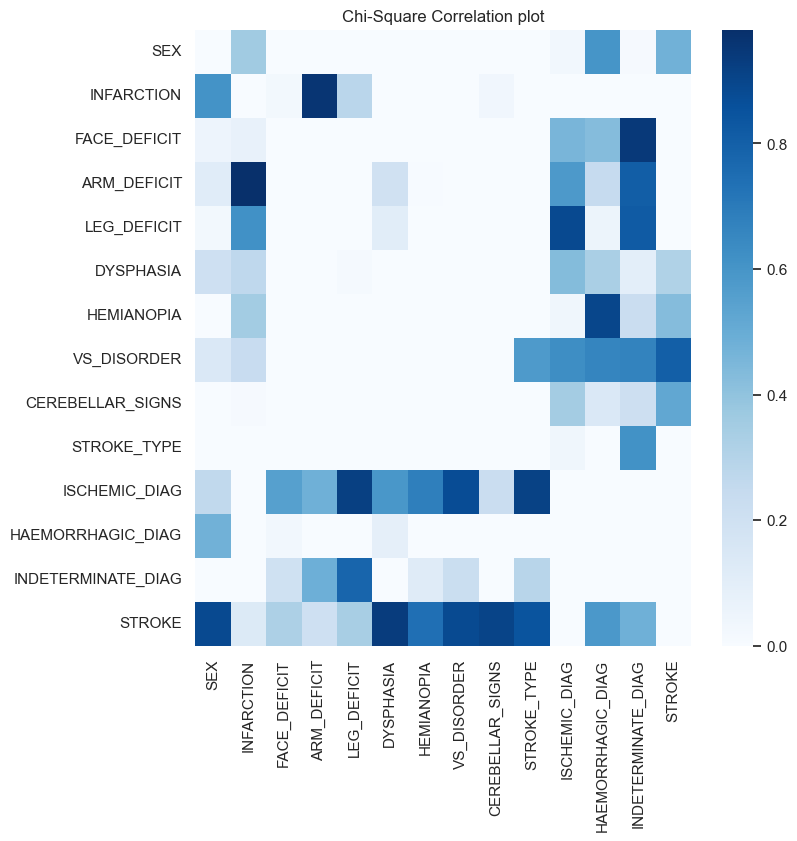

In [15]:
# Plotting a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cmap='Blues')
plt.title('Chi-Square Correlation plot')
plt.show()

In [16]:
ex_data.columns

Index(['SEX', 'AGE', 'BP', 'INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT',
       'LEG_DEFICIT', 'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER',
       'CEREBELLAR_SIGNS', 'STROKE_TYPE', 'ISCHEMIC_DIAG', 'HAEMORRHAGIC_DIAG',
       'INDETERMINATE_DIAG', 'STROKE'],
      dtype='object')

In [17]:
len(ex_data)

19396

In [18]:
#Feature selection
X = ex_data[['SEX', 'AGE', 'BP', 'INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT',
       'LEG_DEFICIT', 'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER',
       'CEREBELLAR_SIGNS']].astype("float64")
y = ex_data['STROKE'].astype("category")

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 45)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

15516
3880
15516
3880


### Before Data Balancing

C:\Users\User1\AppData\Local\Temp\ipykernel_208\220123388.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_train,


Text(0.5, 1.0, 'Classes in the training set before balancing')

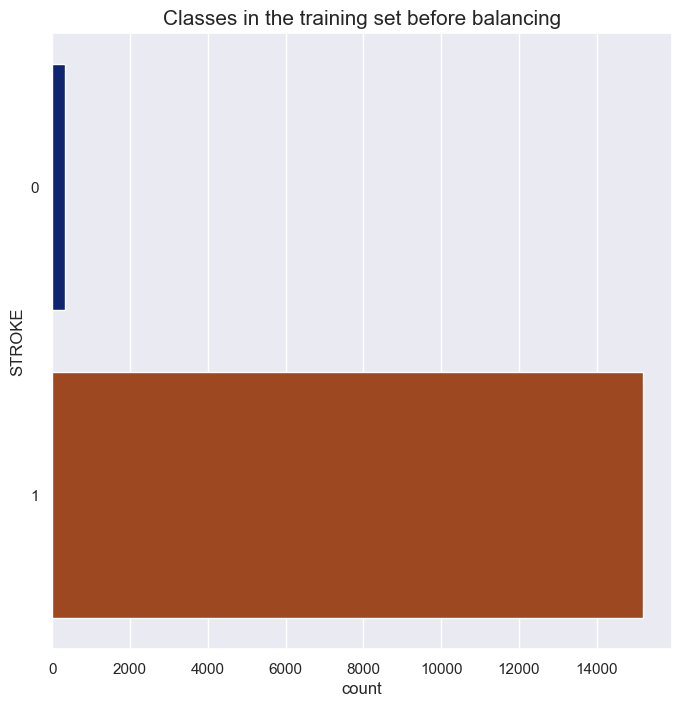

In [20]:
#classes after data balancing
plt.figure(figsize = (8,8))
sns.countplot(y_train,
             palette = "dark")
plt.title("Classes in the training set before balancing",
         fontdict={"fontsize":15})

[0.86082474 0.81696313 0.80458881 0.8716164  0.82882186]
              precision    recall  f1-score   support

           0       0.04      0.27      0.07       420
           1       0.98      0.85      0.91     18976

    accuracy                           0.84     19396
   macro avg       0.51      0.56      0.49     19396
weighted avg       0.96      0.84      0.89     19396

0.16343575995050527


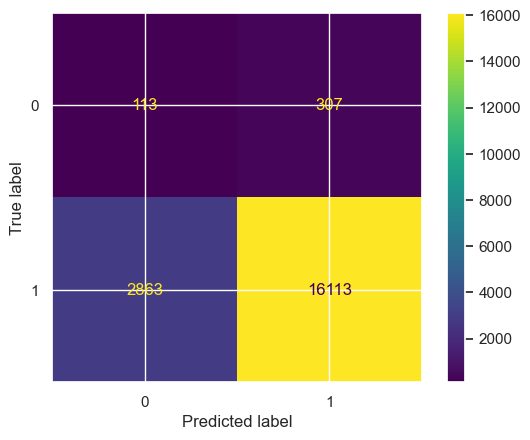

In [21]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm = SVC(class_weight = 'balanced') 
cross_val_results = cross_val_score(svm, X, y, cv=kf)
print(cross_val_results)
svm_y_pred = cross_val_predict(svm, X,y,cv=kf)

# Step 5: Generate a classification report
report = classification_report(y, svm_y_pred)
print(report)
print(mean_squared_error(y, svm_y_pred))
cm = confusion_matrix(y, svm_y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

[0.97010309 0.96674401 0.96957979 0.96957979 0.9675174 ]
              precision    recall  f1-score   support

           0       0.04      0.02      0.03       420
           1       0.98      0.99      0.98     18976

    accuracy                           0.97     19396
   macro avg       0.51      0.50      0.51     19396
weighted avg       0.96      0.97      0.96     19396

0.031088884306042484


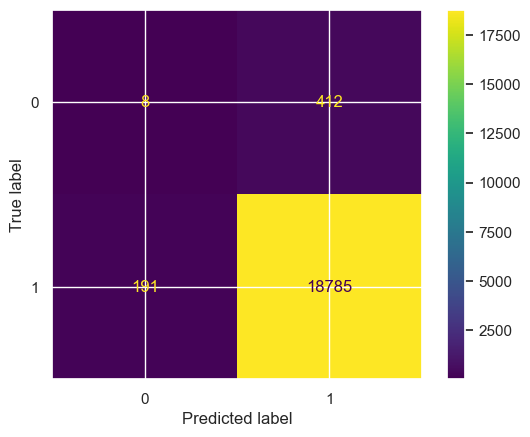

In [22]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfc = RandomForestClassifier(class_weight = 'balanced') 
cross_val_results = cross_val_score(rfc, X, y, cv=kf)
print(cross_val_results)
rfc_y_pred = cross_val_predict(rfc, X,y,cv=kf)

# Step 5: Generate a classification report
report = classification_report(y, rfc_y_pred)
print(report)
print(mean_squared_error(y, rfc_y_pred))
cm = confusion_matrix(y, rfc_y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

C:\Users\User1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.65335052 0.67826759 0.67646301 0.67543181 0.68316576]


C:\Users\User1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

           0       0.04      0.65      0.08       420
           1       0.99      0.67      0.80     18976

    accuracy                           0.67     19396
   macro avg       0.52      0.66      0.44     19396
weighted avg       0.97      0.67      0.79     19396

0.3266652918127449


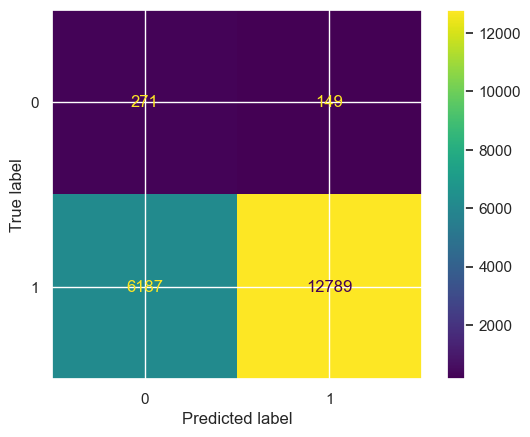

In [23]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lg = LogisticRegression(class_weight = 'balanced') 
cross_val_results = cross_val_score(lg, X, y, cv=kf)
print(cross_val_results)
lg_y_pred = cross_val_predict(lg, X, y, cv=kf)

# Step 5: Generate a classification report
report = classification_report(y, lg_y_pred)
print(report)
print(mean_squared_error(y, lg_y_pred))
cm = confusion_matrix(y, lg_y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

### Data balancing

[0.97319588 0.97189997 0.97215777 0.97344676 0.97138438]
              precision    recall  f1-score   support

           0       0.05      0.01      0.02       420
           1       0.98      0.99      0.99     18976

    accuracy                           0.97     19396
   macro avg       0.51      0.50      0.50     19396
weighted avg       0.96      0.97      0.97     19396

0.027634563827593318


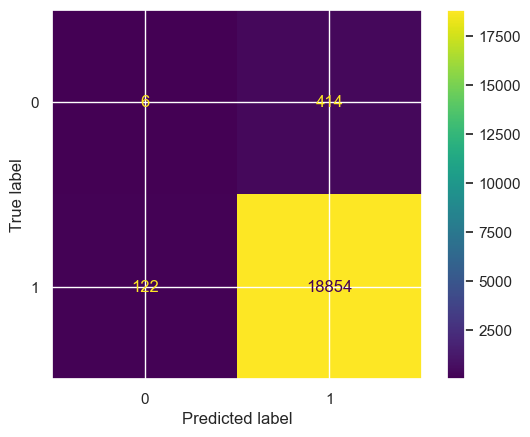

In [27]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced'))
])
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(pipeline, X, y, cv=kf)
print(cross_val_results)
rfc_y_pred_smote = cross_val_predict(pipeline, X, y, cv=kf)

# Step 5: Generate a classification report
report = classification_report(y, rfc_y_pred_smote)
print(report)
print(mean_squared_error(y, rfc_y_pred_smote))
cm = confusion_matrix(y, rfc_y_pred_smote, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

C:\Users\User1\AppData\Local\Temp\ipykernel_208\3053259731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_smote,


Text(0.5, 1.0, 'Classes in the training set after balancing')

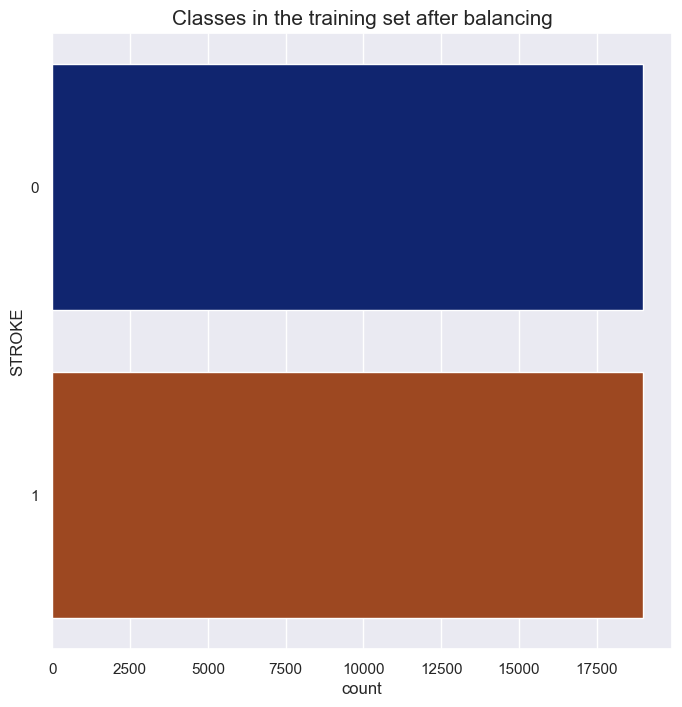

In [36]:
#classes after data balancing
plt.figure(figsize = (8,8))
sns.countplot(y_smote,
             palette = "dark")
plt.title("Classes in the training set after balancing",
         fontdict={"fontsize":15})

[0.84819588 0.76978603 0.76695024 0.84042279 0.80948698]
              precision    recall  f1-score   support

           0       0.04      0.35      0.07       420
           1       0.98      0.82      0.89     18976

    accuracy                           0.81     19396
   macro avg       0.51      0.58      0.48     19396
weighted avg       0.96      0.81      0.87     19396

0.19302949061662197


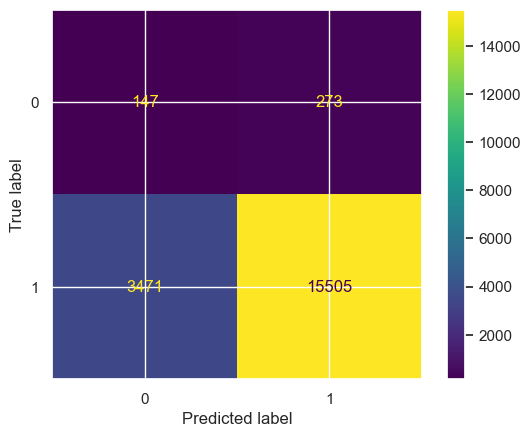

In [28]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(class_weight='balanced'))
])
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(pipeline, X, y, cv=kf)
print(cross_val_results)
svm_y_pred_smote = cross_val_predict(pipeline, X, y, cv=kf)

# Step 5: Generate a classification report
report = classification_report(y, svm_y_pred_smote)
print(report)
print(mean_squared_error(y, svm_y_pred_smote))
cm = confusion_matrix(y, svm_y_pred_smote, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [29]:
smote = SMOTE(random_state = 42)
X_smote,y_smote = smote.fit_resample(X,y)
len(X_smote)

37952

C:\Users\User1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.67216495 0.6774942  0.69760247 0.69089972 0.70043826]


C:\Users\User1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

           0       0.04      0.62      0.08       420
           1       0.99      0.69      0.81     18976

    accuracy                           0.69     19396
   macro avg       0.51      0.65      0.45     19396
weighted avg       0.97      0.69      0.80     19396

0.3122808826562178


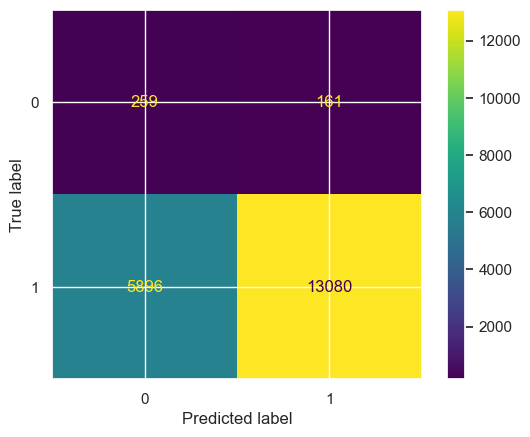

In [33]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(class_weight='balanced'))
])
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(pipeline, X, y, cv=kf)
print(cross_val_results)
lg_y_pred_smote = cross_val_predict(pipeline, X, y, cv=kf)

# Step 5: Generate a classification report
report = classification_report(y, lg_y_pred_smote)
print(report)
print(mean_squared_error(y, lg_y_pred_smote))
cm = confusion_matrix(y, lg_y_pred_smote, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train_smote, y_train_smote)
pred = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test,pred)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.10      0.02      0.04        83
           1       0.98      0.99      0.99      3797

    accuracy                           0.97      3880
   macro avg       0.54      0.51      0.51      3880
weighted avg       0.96      0.97      0.97      3880



In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
kf = KFold(n_splits=4, shuffle=True, random_state=42)
rfc = RandomForestClassifier()
cross_val_results = cross_val_score(rfc, X_smote, y_smote, cv=kf)
print(cross_val_results)
rfc_y_pred = cross_val_predict(rfc, X_smote, y_smote, cv=kf)

# Step 5: Generate a classification report
report = classification_report(y, rfc_y_pred)
print(report)
print(mean_squared_error(y, rfc_y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
kf = KFold(n_splits=4, shuffle=True, random_state=42)
lg = LogisticRegression() 
cross_val_results = cross_val_score(lg, X_smote, y_smote, cv=kf)
print(cross_val_results)
lg_y_pred = cross_val_predict(lg, X_smote, y_smote, cv=kf)

# Step 5: Generate a classification report
report = classification_report(y, lg_y_pred)
print(report)
print(mean_squared_error(y, lg_y_pred))

In [33]:
accuracy = pd.DataFrame({"Models": ["Logistic Regression","SVM","Random Forest"],
                         "Accuracy_scores": [accuracy_score(y_test, lg_pred),
                                           accuracy_score(y_test, svm_pred),
                                           accuracy_score(y_test, pred)]})

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

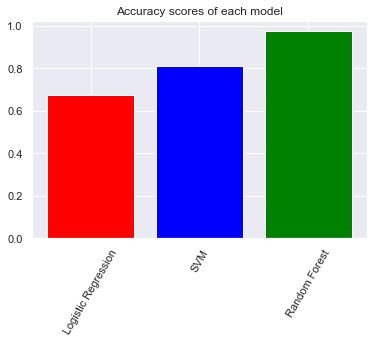

In [34]:
plt.title("Accuracy scores of each model")
plt.bar(accuracy["Models"],
        accuracy["Accuracy_scores"],
       color = ["red", "blue","green"])
plt.xticks(rotation=60)

In [35]:
MSE = pd.DataFrame({"Models": ["Logistic Regression","SVM","Random Forest"],
                         "MSE": [mean_squared_error(y_test, lg_pred),
                                           mean_squared_error(y_test, svm_pred),
                                           mean_squared_error(y_test, pred)]})
MSE

,Models,MSE
0,Logistic Regression,0.326546
1,SVM,0.187629
2,Random Forest,0.025773


([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

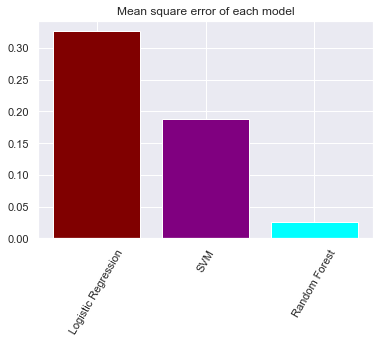

In [36]:
plt.title("Mean square error of each model")
plt.bar("Models",
        "MSE",
        data = MSE,
       color = ["maroon", "purple","cyan"])
plt.xticks(rotation=60)

SEX 0.08593798938711694
AGE 0.06742915679275678
BP 0.05187549650433798
INFARCTION 0.1323957095886191
FACE_DEFICIT 0.17725190129780402
ARM_DEFICIT 0.08345430727925762
LEG_DEFICIT 0.13718709220350328
DYSPHASIA 0.1197588937820161
HEMIANOPIA 0.048528839410377174
VS_DISORDER 0.053362059262588746
CEREBELLAR_SIGNS 0.042818554491622286


Text(0.5, 1.0, 'Effect of each variable on the Random Forest model')

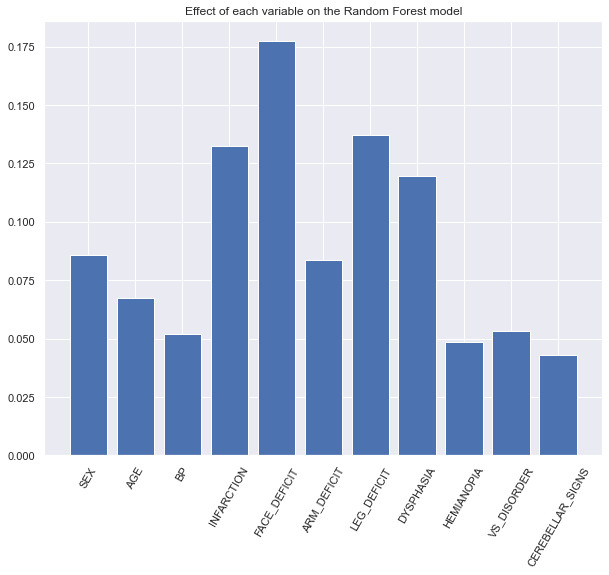

In [37]:
#The effect of the variables on the model
variables =[]
scores = []
for name, score in zip(X_train_smote, rfc.feature_importances_):
    print(name, score)
    variables.append(name)
    scores.append(score)
    
rfc_effect = pd.DataFrame({"Variables": variables,
                         "Effect" : scores})
plt.figure(figsize = (10,8))
plt.bar(rfc_effect["Variables"],
        rfc_effect["Effect"])
plt.xticks(rotation=60)
plt.title("Effect of each variable on the Random Forest model")